## **Project Name**
Employment Trend for Fresh University Graduates Post Covid-**19**


## **I. Problem Statement**
With more than 15000 local university students graduating annually, we would like to explore salary and employment trend especially post Covid-19 as Singapore reinvents her economy. The data includes the newer universities such as SUTD and SUSS but excludes all other private universities. 

Through data exploration we would like to find out the following


>1: Employment rate of all local universities over the past years.

> 2: Which university is the most highly sought after by employers.







## **II. Dataset and Data Preparation**
The Graduate Employment Survey (GES) is jointly conducted by NTU, NUS, SMU, SIT (from 2013), SUTD (from 2015) and SUSS (from 2018) annually to survey the employment conditions of graduates about six months after their final examinations.

URL of dataset: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd

Name of data portal : Data.gov.sg, Govtech SG

This CSV dataset regarding graduates employment, which we found from the gov.sg, has a large enough sample **size** to be statistically useful. The survey data ranges from 2013 to 2018 and provide quartile salary ranges, median salary and employment rate from the course work.

The 2019 datasets were from the Ministry of Manpower Data on starting salaries of the graduating cohorts from the local publicly-funded institutions of higher learning facilitate the comparison of starting salaries across various courses from the universities

https://stats.mom.gov.sg/Pages/Graduate-Starting-Salary-Tables2019.aspx 


## **III. Insights / Evaluation**

Through data exploration we have found out that SMU graduates are highly sought after. With an overall employment rate of more than 94% and the highest gross median salary. The median salary of fresh graduates from local universities have been steadily increasing over the years. In 2019, employment rate has fallen compared to the previous years.

In future, a comparison can be made between the local and private universities to compare the differences in salary and employment rate

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Run this cell to remove the warning messages that could appear during your data cleaning
import warnings
warnings.filterwarnings('ignore')

# **Dataset**


In [3]:
df = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding='latin1', engine = 'python')
df.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [4]:
display(df.dtypes)
print('Number of rows and columns', df.shape)

year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object

Number of rows and columns (703, 12)


# **Converting Data Types for futher analysis**

In [5]:
columns_to_select = ['employment_rate_overall', 'employment_rate_ft_perm', 'gross_monthly_median',\
                     'gross_mthly_25_percentile', 'gross_mthly_75_percentile', 'basic_monthly_mean',\
                     'basic_monthly_median', 'gross_monthly_mean']
df[columns_to_select] = df[columns_to_select].apply(pd.to_numeric, errors='coerce', axis=1)
df.dtypes

year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object

In [6]:
columns_to_select = ['employment_rate_overall', 'employment_rate_ft_perm', 'gross_monthly_median']
overall_df = df[columns_to_select]
overall_df.describe(include='all')

,employment_rate_overall,employment_rate_ft_perm,gross_monthly_median
count,630.000000,630.000000,630.000000
mean,90.544921,82.673968,3380.304762
std,6.911726,13.405332,507.325954
min,66.700000,14.300000,1800.000000
25%,86.025000,74.750000,3085.750000
50%,91.300000,85.600000,3300.000000
75%,96.200000,93.075000,3533.250000
max,100.000000,100.000000,5800.000000


####  From this we are able to see the descriptive statistics for all of the fresh graduates surveyed. Overall 90.5% of the fresh graduates are able to find employment within 6 months after graduation with 82.6% being employed as a permanent employee. The median gross salary across all schools and courses is $3380

# Statistics & Observations

In [7]:
#Keeping only the rows that contail non-null values in a new temporary dataframe called 'null_removed_df'

null_removed_df = df.dropna()
null_removed_df.shape
#null_removed_df.isnull().sum()

(630, 12)

In [8]:
#Statistics for each university's employment rate
null_removed_groupby_university = null_removed_df.groupby(['university'])
null_removed_groupby_university['employment_rate_overall'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
Nanyang Technological University,204.0,87.832353,7.484140,66.7,82.025,88.00,93.225,100.0
National University of Singapore,207.0,91.043961,6.419278,71.9,87.150,91.70,96.450,100.0
Singapore Institute of Technology,135.0,91.680000,6.663442,72.2,86.850,92.30,97.000,100.0
Singapore Management University,72.0,94.480556,3.731353,84.2,92.200,94.85,97.425,100.0
Singapore University of Social Sciences,3.0,93.566667,5.363146,88.0,91.000,94.00,96.350,98.7
Singapore University of Technology and Design,9.0,91.033333,6.346653,80.3,87.000,91.70,92.500,100.0


#### Comparing the statistics from each university, we can easily observe that Singapore Management University has the highest average employment rate across all it's faculties.


In [9]:
#Statistics for each university's gross monthly mean salary
null_removed_groupby_university['gross_monthly_mean'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
Nanyang Technological University,204.0,3393.813725,347.356895,2577.0,3171.25,3370.5,3577.00,5225.0
National University of Singapore,207.0,3586.536232,540.795896,2100.0,3281.50,3435.0,3819.50,5263.0
Singapore Institute of Technology,135.0,3264.407407,384.181943,2344.0,2962.50,3301.0,3485.00,4131.0
Singapore Management University,72.0,4097.069444,624.894297,3150.0,3610.00,3944.5,4455.25,5617.0
Singapore University of Social Sciences,3.0,3098.333333,265.151529,2879.0,2951.00,3023.0,3208.00,3393.0
Singapore University of Technology and Design,9.0,3866.777778,231.946534,3565.0,3690.00,3830.0,3956.00,4232.0


Comparing the statistics from each university, we can easily observe that on average, Singapore Management University graduates receive the highest salary across all it's faculties.

# Merging 3 (2019) datasets into single DataFrame

In [10]:
import numpy as np
import pandas as pd
result_2019 = pd.read_excel('EMPT_011_Monthly_Gross_Starting_Salary_of_Graduates.xls', skiprows = 1, header = 1)
result_2019.head()

,Course Duration,Course Cluster,Degree,Abbreviation,Universities conducting the courses,Employment Rate (%),Median Monthly Gross Starting Salary ($)
0,4-year,"ARTS, DESIGN & MEDIA",Bachelor of Arts (Honours),B.A.(H),NUS,68.2,3500.0
1,NaN,NaN,Bachelor of Communication Studies (Honours),B.Comm.Studies (H),NTU,69.4,3200.0
2,NaN,NaN,"Bachelor of Fine Arts (Arts, Design & Media)",B.F.A.,NTU,50.9,3000.0
3,NaN,BUILT ENVIRONMENT,Bachelor of Science (Project & Facilities Mana...,B.Sc.(Proj & FM),NUS,80.6,3155.0
4,NaN,NaN,Bachelor of Science (Real Estate),B.Sc.(RE),NUS,89.6,3400.0


In [11]:
relevant_2019 = result_2019[['Degree', 'Universities conducting the courses', 'Employment Rate (%)', 'Median Monthly Gross Starting Salary ($)']].copy()
relevant_2019.head()

,Degree,Universities conducting the courses,Employment Rate (%),Median Monthly Gross Starting Salary ($)
0,Bachelor of Arts (Honours),NUS,68.2,3500.0
1,Bachelor of Communication Studies (Honours),NTU,69.4,3200.0
2,"Bachelor of Fine Arts (Arts, Design & Media)",NTU,50.9,3000.0
3,Bachelor of Science (Project & Facilities Mana...,NUS,80.6,3155.0
4,Bachelor of Science (Real Estate),NUS,89.6,3400.0


In [12]:
relevant_2019.shape

(68, 4)

### removing null values

In [13]:
relevant_2019.isnull().sum()

Degree                                      2
Universities conducting the courses         2
Employment Rate (%)                         2
Median Monthly Gross Starting Salary ($)    2
dtype: int64

In [14]:
df_null = relevant_2019[relevant_2019.isna().any(axis=1)]
print (df_null)

   Degree Universities conducting the courses  Employment Rate (%)  \
66    NaN                                 NaN                  NaN   
67    NaN                                 NaN                  NaN   

    Median Monthly Gross Starting Salary ($)  
66                                       NaN  
67                                       NaN  


In [15]:
relevant_df = relevant_2019.dropna()
relevant_df.shape

(66, 4)

### Rename columns to match existing

In [16]:
relevant_df.rename(columns = {'Universities conducting the courses':'university', 'Degree':'degree', 
                              'Employment Rate (%)':'employment_rate_overall', 'Median Monthly Gross Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
relevant_df.columns

Index(['degree', 'university', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [17]:
relevant_df['university'].unique()

array(['NUS', 'NTU', 'SUSS', 'SMU'], dtype=object)

### Changing values in columns to match exisisting DataFrame

In [18]:
def uni_name(university):
    if university == 'NUS':
        return 'National University of Singapore'
    elif university =='NTU':
        return 'Nanyang Technological University'
    elif university == 'SMU':
        return 'Singapore Management University'
    else :
        return 'Singapore University of Social Sciences'
    
relevant_df['university'] = relevant_df['university'].apply(uni_name)
relevant_df.head()

,degree,university,employment_rate_overall,gross_monthly_median
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500.0
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200.0
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000.0
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155.0
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400.0


In [19]:
sutd_2019 = pd.read_excel('SUTD 2019 Graduate Employment Rate _ Starting Salary.xlsx', header=3)
sutd_2019.head()

,University,Degree,Full-Time Permanent Employment (%),Median Gross Monthly Starting Salary ($)
0,NaN,NaN,NaN,NaN
1,Singapore University of Technology and Design,Bachelor of Engineering (Engineering Product D...,80.2,4000.0
2,Singapore University of Technology and Design,Bachelor of Engineering (Engineering Systems a...,87.3,4000.0
3,Singapore University of Technology and Design,Bachelor of Engineering (Information Systems T...,85.7,4400.0


In [20]:
sutd_2019.rename(columns = {'Degree':'degree','University':'university','Full-Time Permanent Employment (%)':'employment_rate_overall', 'Median Gross Monthly Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
sutd_2019.columns

Index(['university', 'degree', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [21]:
sutd_2019.shape

(4, 4)

In [22]:
sit_2019 = pd.read_excel('SIT 2019 Graduate Employment Rate _ Starting Salary.xlsx', header = 3)
sit_2019.head()

,University,Degree,Full-Time Permanent Employment (%),Median Gross Monthly Starting Salary ($)
0,NaN,NaN,NaN,NaN
1,Singapore Institute of Technology,DigiPen Institute of Technology,NaN,NaN
2,Singapore Institute of Technology,Bachelor of Science in Computer Science in Rea...,96.8,s
3,Singapore Institute of Technology,The Glasgow School of Art,NaN,NaN
4,Singapore Institute of Technology,Bachelor of Arts with Honours in Interior Design,76.9,2775


In [23]:
sit_2019.rename(columns = {'Degree':'degree','University':'university',  
                              'Full-Time Permanent Employment (%)':'employment_rate_overall', 'Median Gross Monthly Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
sit_2019.columns

Index(['university', 'degree', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [24]:
sit_2019.shape

(30, 4)

In [25]:
all_uni_2019 = pd.concat([relevant_df, sutd_2019, sit_2019], axis = 0, sort=False)
all_uni_2019.head()

,degree,university,employment_rate_overall,gross_monthly_median
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400


In [26]:
all_uni_2019.shape

(100, 4)

In [27]:
all_uni_2019.isnull().sum()

degree                      2
university                  2
employment_rate_overall    12
gross_monthly_median       12
dtype: int64

In [28]:
final_2019 = all_uni_2019.dropna()
final_2019.shape

(88, 4)

In [29]:
final_2019['year'] = '2019'
final_2019.head()

,degree,university,employment_rate_overall,gross_monthly_median,year
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500,2019
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200,2019
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000,2019
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155,2019
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400,2019


In [30]:
columns_to_select = ['employment_rate_overall', 'gross_monthly_median']
final_2019[columns_to_select] = final_2019[columns_to_select].apply(pd.to_numeric, errors='coerce', axis=1)
df.dtypes

year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object

In [31]:
new_df = pd.concat([null_removed_df, final_2019], ignore_index=True)
new_df

,basic_monthly_mean,basic_monthly_median,degree,employment_rate_ft_perm,employment_rate_overall,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,school,university,year
0,3701.0,3200.0,Accountancy and Business,96.1,97.4,3727.0,3350.0,2900.0,4000.0,College of Business (Nanyang Business School),Nanyang Technological University,2013
1,2850.0,2700.0,Accountancy (3-yr direct Honours Programme),95.7,97.1,2938.0,2700.0,2700.0,2900.0,College of Business (Nanyang Business School),Nanyang Technological University,2013
2,3053.0,3000.0,Business (3-yr direct Honours Programme),85.7,90.9,3214.0,3000.0,2700.0,3500.0,College of Business (Nanyang Business School),Nanyang Technological University,2013
3,3557.0,3400.0,Business and Computing,87.5,87.5,3615.0,3400.0,3000.0,4100.0,College of Business (Nanyang Business School),Nanyang Technological University,2013
4,3494.0,3500.0,Aerospace Engineering,95.3,95.3,3536.0,3500.0,3100.0,3816.0,College of Engineering,Nanyang Technological University,2013
5,2952.0,2900.0,Bioengineering,68.8,81.3,3166.0,3125.0,2893.0,3365.0,College of Engineering,Nanyang Technological University,2013
6,3235.0,3000.0,Chemical and Biomolecular Engineering,85.1,87.3,3377.0,3200.0,3000.0,3800.0,College of Engineering,Nanyang Technological University,2013
7,3326.0,3100.0,Computer Engineering,88.2,90.3,3374.0,3175.0,3000.0,3600.0,College of Engineering,Nanyang Technological University,2013
8,3091.0,3000.0,Civil Engineering,93.8,94.8,3182.0,3100.0,3000.0,3380.0,College of Engineering,Nanyang Technological University,2013
9,3249.0,3000.0,Computer Science,88.5,92.1,3306.0,3125.0,3000.0,3600.0,College of Engineering,Nanyang Technological University,2013




```
# This is formatted as code
```

# Employment Rate and Median Salary versus Years

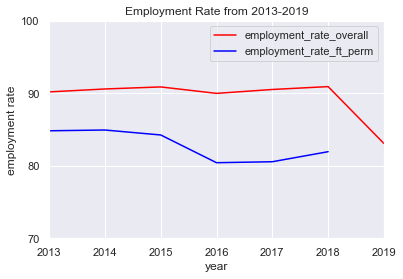

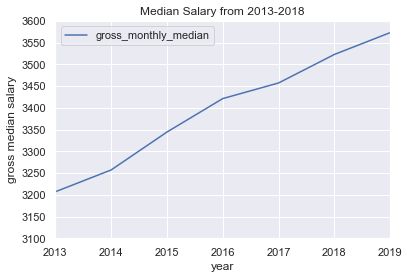

In [32]:
sns.set()
yeargb = new_df.groupby(new_df['year'])
yeargb.head()
mean = yeargb.mean()
ax = plt.gca()

mean.plot(kind='line',             
          y='employment_rate_overall',
          color='red',
          ax=ax)

mean.plot(kind='line',             
                y='employment_rate_ft_perm',
                color='blue',
                ax=ax)                
              
#plt.xticks(np.arange(10,65,5))
plt.ylabel('employment rate')
plt.yticks(np.arange(70,101,10))
plt.title('Employment Rate from 2013-2019')
plt.show()
mean.plot(kind='line',
          y='gross_monthly_median')

plt.ylabel('gross median salary')
plt.yticks(np.arange(3100,3650,50))
plt.title('Median Salary from 2013-2018')
plt.show()


Over the past couple of years we can see that the gross median salary has been increasing steadily year on year. While in 2019, employment rate dropped. 

### **New column 'uni'**

In [33]:
new_df['university'].unique()

array(['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University',
       'Singapore Institute of Technology',
       'Singapore University of Technology and Design',
       'Singapore University of Social Sciences',
       'Singapore University of Technology and  Design'], dtype=object)

*there are 2 entries for sutd*

In [34]:
def uni_abr_name(university):
    sutd = ['Singapore University of Technology and Design','Singapore University of Technology and  Design']
    if university in sutd:
        return 'SUTD'
    elif university =='Nanyang Technological University':
        return 'NTU'
    elif university =='National University of Singapore':
        return 'NUS'
    elif university == 'Singapore Management University':
        return 'SMU'
    elif university == 'Singapore Institute of Technology':
        return 'SIT'
    else:
      return 'SUSS'
    
new_df['uni'] = new_df['university'].apply(uni_abr_name)
new_df.head()

,basic_monthly_mean,basic_monthly_median,degree,employment_rate_ft_perm,employment_rate_overall,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,school,university,year,uni
0,3701.0,3200.0,Accountancy and Business,96.1,97.4,3727.0,3350.0,2900.0,4000.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
1,2850.0,2700.0,Accountancy (3-yr direct Honours Programme),95.7,97.1,2938.0,2700.0,2700.0,2900.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
2,3053.0,3000.0,Business (3-yr direct Honours Programme),85.7,90.9,3214.0,3000.0,2700.0,3500.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
3,3557.0,3400.0,Business and Computing,87.5,87.5,3615.0,3400.0,3000.0,4100.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
4,3494.0,3500.0,Aerospace Engineering,95.3,95.3,3536.0,3500.0,3100.0,3816.0,College of Engineering,Nanyang Technological University,2013,NTU


### **Median Salary by University**

Text(0.5, 1.0, 'Median Salary by University')

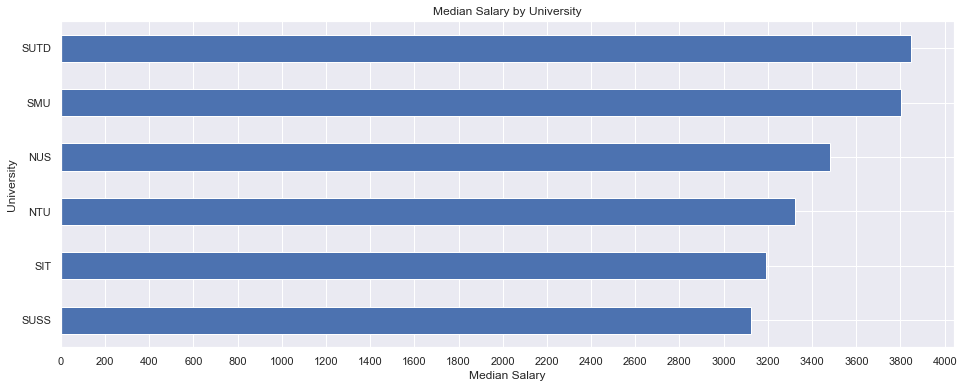

In [35]:
sns.set()
new_df_gbuni= new_df.groupby("uni")
median_gbuni = new_df_gbuni['gross_monthly_median'].mean()
median_gbuni = median_gbuni.sort_values(ascending=True)
median_gbuni.plot(
                  kind = 'barh',
                  figsize = (16,6))

plt.ylabel("University")
plt.xlabel("Median Salary")
plt.xticks(np.arange(0,4200,200))
plt.title('Median Salary by University')



In [36]:
print("There are",new_df['degree'].nunique(), "unique values in the degree column")
print(new_df['degree'].unique())

There are 288 unique values in the degree column
['Accountancy and Business' 'Accountancy (3-yr direct Honours Programme)'
 'Business (3-yr direct Honours Programme)' 'Business and Computing'
 'Aerospace Engineering' 'Bioengineering'
 'Chemical and Biomolecular Engineering' 'Computer Engineering'
 'Civil Engineering' 'Computer Science'
 'Electrical and Electronic Engineering' 'Environmental Engineering'
 'Information Engineering and Media' 'Materials Engineering'
 'Mechanical Engineering' 'Maritime Studies' 'Art, Design & Media'
 'Chinese' 'Communication Studies' 'Economics' 'English'
 'Linguistics and Multilingual Studies' 'Psychology' 'Sociology'
 'Biomedical Sciences (Traditional Chinese Medicine) #'
 'Biological Sciences' 'Chemistry & Biological Chemistry'
 'Mathematical Science' 'Physics / Applied Physics'
 'Sports Science and Management' 'Science (with Education)'
 'Arts (with Education)' 'Bachelor of Arts' 'Bachelor of Arts (Hons)'
 'Bachelor of Social Sciences' 'Bachelor of Bus

In [37]:
new_df['university'].unique()
schools = ['Nanyang Technological University',
       'National University of Singapore',
       'Singapore Management University']
ntu_nus_smu_df = new_df[new_df['university'].isin(schools)]
ntu_nus_smu_df

,basic_monthly_mean,basic_monthly_median,degree,employment_rate_ft_perm,employment_rate_overall,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,school,university,year,uni
0,3701.0,3200.0,Accountancy and Business,96.1,97.4,3727.0,3350.0,2900.0,4000.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
1,2850.0,2700.0,Accountancy (3-yr direct Honours Programme),95.7,97.1,2938.0,2700.0,2700.0,2900.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
2,3053.0,3000.0,Business (3-yr direct Honours Programme),85.7,90.9,3214.0,3000.0,2700.0,3500.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
3,3557.0,3400.0,Business and Computing,87.5,87.5,3615.0,3400.0,3000.0,4100.0,College of Business (Nanyang Business School),Nanyang Technological University,2013,NTU
4,3494.0,3500.0,Aerospace Engineering,95.3,95.3,3536.0,3500.0,3100.0,3816.0,College of Engineering,Nanyang Technological University,2013,NTU
5,2952.0,2900.0,Bioengineering,68.8,81.3,3166.0,3125.0,2893.0,3365.0,College of Engineering,Nanyang Technological University,2013,NTU
6,3235.0,3000.0,Chemical and Biomolecular Engineering,85.1,87.3,3377.0,3200.0,3000.0,3800.0,College of Engineering,Nanyang Technological University,2013,NTU
7,3326.0,3100.0,Computer Engineering,88.2,90.3,3374.0,3175.0,3000.0,3600.0,College of Engineering,Nanyang Technological University,2013,NTU
8,3091.0,3000.0,Civil Engineering,93.8,94.8,3182.0,3100.0,3000.0,3380.0,College of Engineering,Nanyang Technological University,2013,NTU
9,3249.0,3000.0,Computer Science,88.5,92.1,3306.0,3125.0,3000.0,3600.0,College of Engineering,Nanyang Technological University,2013,NTU


```
# We want to find out more about the 
following sectors which employ the most graduates from the 3 main universities(nus,smu,ntu):
1.Business
2.Engineering
3.Sciences
4. Information Technology
5. Arts and Social Sciences

```



### Categorise the courses into various industries



```
To split the various degrees in these 5 sectors
We need a new column 'industry'
```



In [38]:
# sets the industry column based on school/faculty
def category(school):
  sch = str(school)
  science = ['college of sciences', 'faculty of science']
  it = ['computing', 'information systems']
  if 'business' in sch.lower() or 'economics' in sch.lower() or 'accountancy' in sch.lower():
    return 'bs'
  elif ('engineering' in sch.lower()):
    return 'eng'
  elif sch.lower() in science:
    return 'sci'
  elif 'computing' in sch.lower():
    return 'it'
  elif 'information systems' in sch.lower():
    return 'it'
  elif 'social science' in sch.lower():
    return 'sosci' 
  else:
    return 'na'

In [39]:
ntu_nus_smu_df['industry'] = ntu_nus_smu_df['school'].apply(category)

In [40]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)


In [41]:
# create a new df only showing industry and the employment rate, salary 
# total 5 rows
by_industry = ntu_nus_smu_df.groupby(['industry']).mean()
by_industry_ero = by_industry.sort_values('employment_rate_overall')
by_industry_fter = by_industry.sort_values('employment_rate_ft_perm')
by_industry_gross = by_industry.sort_values('gross_monthly_median')

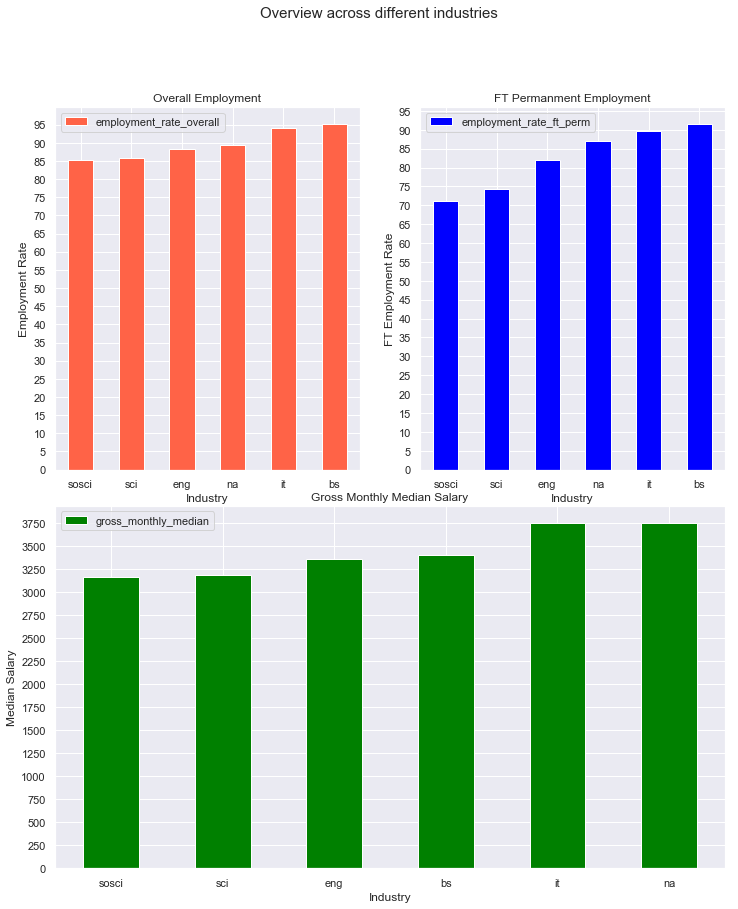

In [42]:
sns.set()
fig = plt.figure(figsize=(12, 14))

# The first number is the no. of rows. 
# The second number is the no. of columns.
# The third number is the plot number. Count right, then count down.
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2)

#Plot for overall employment rate
by_industry_ero.plot(kind='bar', y='employment_rate_overall',ax=ax1,color='tomato', rot=0)
ax1.set_ylabel("Employment Rate")
ax1.set_title("Overall Employment")
ax1.set_yticks(np.arange(0, 100, 5)) #This needs to be specified so both charts are on the same scale.
ax1.set_xlabel("Industry")

#Plot for FT Employment Rate
by_industry_fter.plot(kind='bar', y='employment_rate_ft_perm',ax=ax2,color='blue', rot=0)
ax2.set_ylabel("FT Employment Rate")
ax2.set_title("FT Permanment Employment")
ax2.set_yticks(np.arange(0, 100, 5)) #This needs to be specified so both charts are on the same scale.
ax2.set_xlabel("Industry")

#Plot for Gross Median Salary
by_industry_gross.plot(kind='bar', y='gross_monthly_median',ax=ax3,color='green', rot=0)
ax3.set_ylabel("Median Salary")
ax3.set_title("Gross Monthly Median Salary")
ax3.set_yticks(np.arange(0, 4000, 250)) #This needs to be specified so both charts are on the same scale.
ax3.set_xlabel("Industry")

plt.subplots_adjust(hspace=0.1)
plt.suptitle("Overview across different industries", fontsize=15)
plt.show()

In [43]:
by_industry_year = ntu_nus_smu_df.groupby(['industry','year']).mean().reset_index()
years = [2013,2014,2015,2016,2017,2018]
by_industry_year = by_industry_year[by_industry_year['year'].isin(years)]
by_industry_year.head()

,industry,year,basic_monthly_mean,basic_monthly_median,employment_rate_ft_perm,employment_rate_overall,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,bs,2013,3316.428571,3044.142857,90.885714,93.557143,3424.071429,3121.000000,2832.142857,3622.714286
1,bs,2014,3484.500000,3214.285714,90.171429,93.621429,3561.571429,3254.857143,2957.428571,3827.000000
2,bs,2015,3641.500000,3323.857143,92.978571,96.014286,3786.214286,3414.000000,3057.142857,4032.500000
3,bs,2016,3672.357143,3360.714286,90.807143,95.264286,3755.357143,3466.071429,3124.642857,4061.857143
4,bs,2017,3934.285714,3495.000000,91.792857,96.214286,4048.285714,3560.714286,3180.928571,4330.000000


In [44]:
# Create a list, all_industries of 5 DataFrames, where each DataFrame is a industry
industry_keys = ['sosci','sci','eng','bs','it']
all_industries = [] #a list of dataframes, one for each industry

for industry in industry_keys:
    cond1 =  by_industry_year[by_industry_year['industry'] == industry] # <specify the condition to check in for loop>
    temp_df = cond1[['year','employment_rate_overall', 'gross_monthly_median']] # <select only the 3 required columns>
    all_industries.append(temp_df)

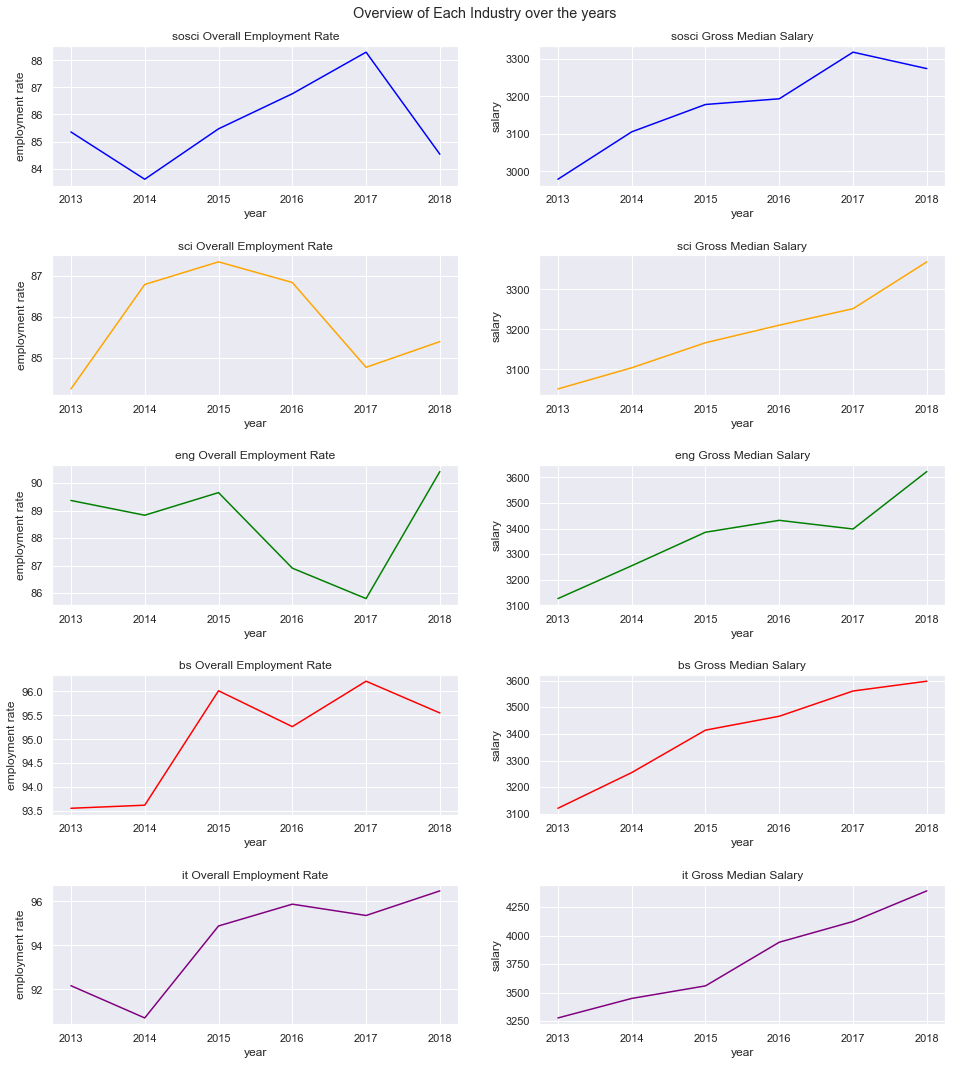

In [45]:

plotting_index = 0 # index to the current plot
colors = ['blue','orange','green','red','purple'] # all the colors of the plots
industry_keys = ['sosci','sci','eng','bs','it']
industry_index = 0

fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(16,18))  # 5 rows (one for each Grade), 2 columns

for industry_series in all_industries:   # plot for each grade list
    
    plotting_industry = industry_keys[industry_index]
    plotting_color = colors[industry_index]
    
    # Get each row's Axis, for each row there are 2 columns, therefore ax1 and ax2
    ax1 = axes[plotting_index][0]
    ax2 = axes[plotting_index][1]
    
    # plot the employment rate over the years
    sns.lineplot(y=industry_series['employment_rate_overall'], x=industry_series['year'], ax=ax1, color=plotting_color)
    ax1.set_title(plotting_industry + ' Overall Employment Rate')
    ax1.set_xlabel('year')
    ax1.set_ylabel('employment rate')
    
    # plot the gross salary over the years
    sns.lineplot(y=industry_series['gross_monthly_median'], x=industry_series['year'], ax=ax2, color=plotting_color)
    ax2.set_title(plotting_industry + ' Gross Median Salary')
    ax2.set_xlabel('year')
    ax2.set_ylabel('salary')
    
    plotting_index += 1
    industry_index += 1
    
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Overview of Each Industry over the years',y=0.91)
plt.show()

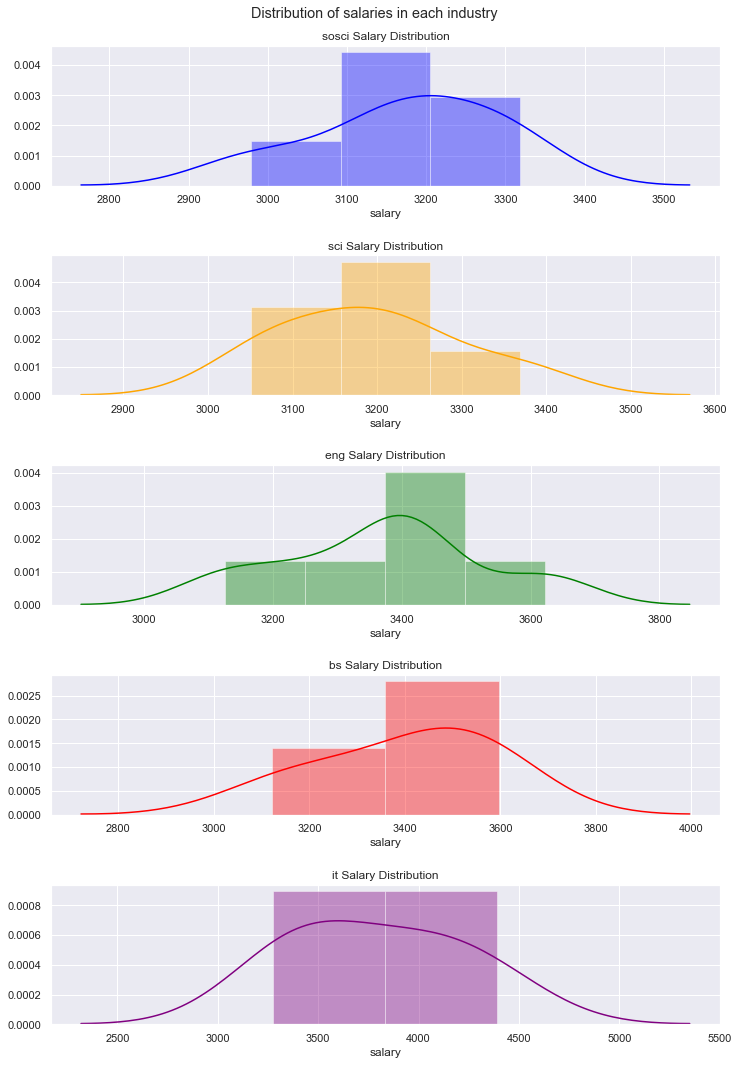

In [46]:
plotting_index = 0 # index to the current plot
colors = ['blue','orange','green','red','purple'] # all the colors of the plots
industry_keys = ['sosci','sci','eng','bs','it']
industry_index = 0

fig, axes = plt.subplots(nrows=5,ncols=1,figsize=(12,18))  # 5 rows (one for each Grade), 2 columns

for industry_series in all_industries:   # plot for each grade list
    
    plotting_industry = industry_keys[industry_index]
    plotting_color = colors[industry_index]
    
    # Get each row's Axis, for each row there are 2 columns, therefore ax1 and ax2
    ax1 = axes[plotting_index]
    
    # plot the gross salary over the years
    sns.distplot(industry_series['gross_monthly_median'], ax=ax1, color=plotting_color)
    ax1.set_title(plotting_industry + ' Salary Distribution')
    ax1.set_xlabel('salary')
    ax1.set_ylabel('')
    
    plotting_index += 1
    industry_index += 1
    
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of salaries in each industry',y=0.91)
plt.show()

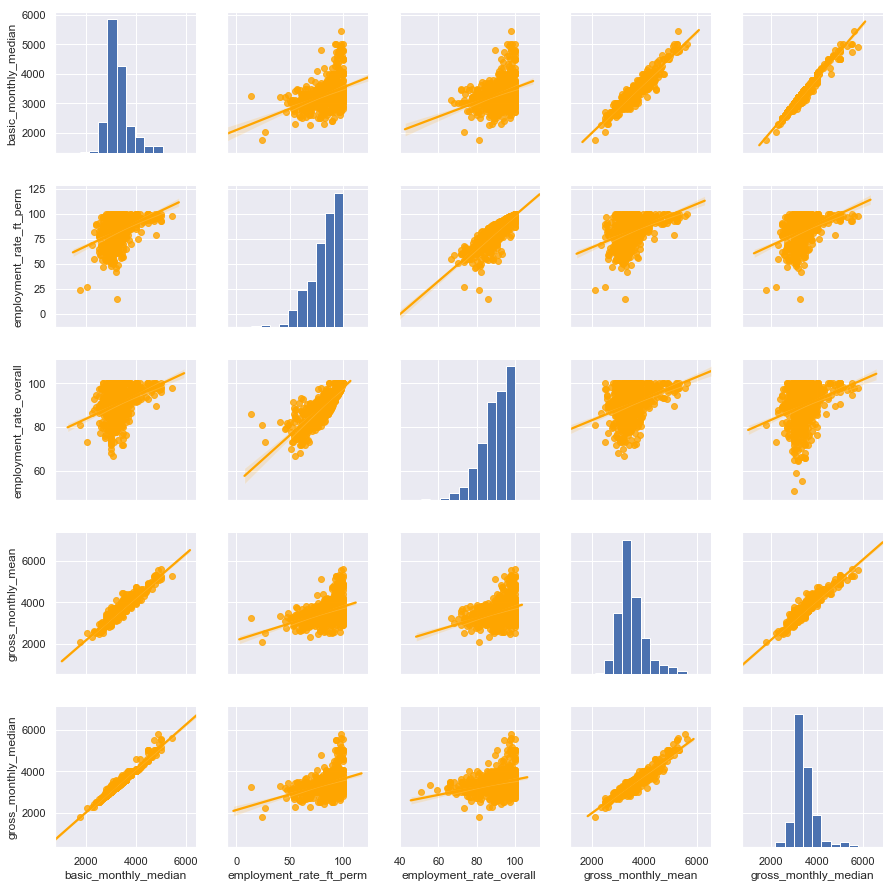

In [47]:
# Let's have a general sense of the distributions in this dataset
# To check for further low variability or extreme skewness
df_pairplot = new_df.drop(['year','gross_mthly_25_percentile','gross_mthly_75_percentile','basic_monthly_mean'], axis=1)
g = sns.pairplot(df_pairplot, kind='reg', plot_kws={'color':'orange'})

### Correlation Matrix
We would like to investigate if there are variables/columns that could be highly correlated with one another.

In [48]:
# filter out the numerical columns only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df.select_dtypes(include=numerics)
numeric_df_corr = new_df.corr()
#change the style of matrix in color
numeric_df_corr.style.background_gradient(cmap='PuBu', low=0, high=0)\
.set_precision(2)

,basic_monthly_mean,basic_monthly_median,employment_rate_ft_perm,employment_rate_overall,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
basic_monthly_mean,1,0.95,0.43,0.38,0.99,0.93,0.89,0.96
basic_monthly_median,0.95,1,0.41,0.36,0.94,0.98,0.95,0.93
employment_rate_ft_perm,0.43,0.41,1,0.85,0.42,0.4,0.49,0.36
employment_rate_overall,0.38,0.36,0.85,1,0.37,0.29,0.41,0.31
gross_monthly_mean,0.99,0.94,0.42,0.37,1,0.95,0.9,0.97
gross_monthly_median,0.93,0.98,0.4,0.29,0.95,1,0.95,0.93
gross_mthly_25_percentile,0.89,0.95,0.49,0.41,0.9,0.95,1,0.86
gross_mthly_75_percentile,0.96,0.93,0.36,0.31,0.97,0.93,0.86,1


It is not suprising to see the columns which have high correlation with one another are columns describing the salary. However, between salary and columns describing the employment rate, there is not much correlation with one another. Meaning, employment rates do not greatly impact salary and vice versa

### Visualise in heatmap

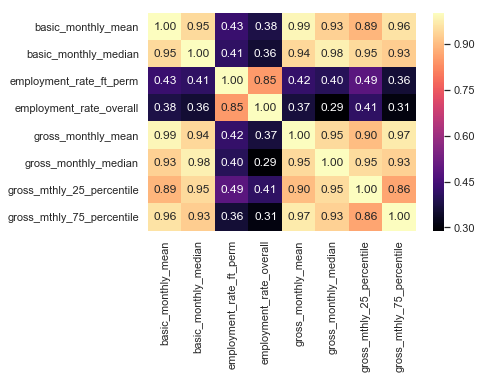

In [54]:
g = sns.heatmap(numeric_df_corr, annot=True, fmt=".2f", cmap = "magma" )